In [1]:
import xlrd
from xlrd import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import itertools
import seaborn as sns
%matplotlib inline

[0.         0.001002   0.00200401 0.00300601 0.00400802 0.00501002
 0.00601202 0.00701403 0.00801603 0.00901804 0.01002004 0.01102204
 0.01202405 0.01302605 0.01402806 0.01503006 0.01603206 0.01703407
 0.01803607 0.01903808 0.02004008 0.02104208 0.02204409 0.02304609
 0.0240481  0.0250501  0.0260521  0.02705411 0.02805611 0.02905812
 0.03006012 0.03106212 0.03206413 0.03306613 0.03406814 0.03507014
 0.03607214 0.03707415 0.03807615 0.03907816 0.04008016 0.04108216
 0.04208417 0.04308617 0.04408818 0.04509018 0.04609218 0.04709419
 0.04809619 0.0490982  0.0501002  0.0511022  0.05210421 0.05310621
 0.05410822 0.05511022 0.05611222 0.05711423 0.05811623 0.05911824
 0.06012024 0.06112224 0.06212425 0.06312625 0.06412826 0.06513026
 0.06613226 0.06713427 0.06813627 0.06913828 0.07014028 0.07114228
 0.07214429 0.07314629 0.0741483  0.0751503  0.0761523  0.07715431
 0.07815631 0.07915832 0.08016032 0.08116232 0.08216433 0.08316633
 0.08416834 0.08517034 0.08617234 0.08717435 0.08817635 0.0891

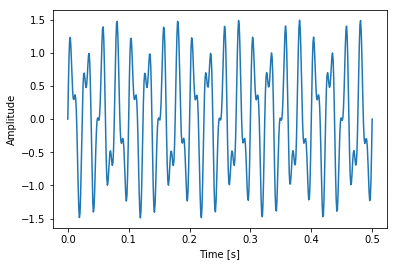

In [11]:
t = np.linspace(0, 0.5, 500)
print(t)
s = np.sin(40 * 2 * np.pi * t) + 0.5 * np.sin(90 * 2 * np.pi * t)
plt.ylabel("Amplitude")
plt.xlabel("Time [s]")
plt.plot(t, s)
plt.show()

In [40]:
fft = np.fft.fft(s)

for i in range(2):
    print("Value at index {}:\t{}".format(i, fft[i + 1]), "\nValue at index {}:\t{}".format(fft.size -1 - i, fft[-1 - i]))

Value at index 0:	(0.00038048349283911764-0.06055503176189901j) 
Value at index 499:	(0.00038048349283911764+0.06055503176189901j)
Value at index 1:	(0.0015317714831384055-0.12188808528069359j) 
Value at index 498:	(0.0015317714831384055+0.12188808528069359j)


[8.34887715e-17 1.21112454e-04 2.43795420e-04 3.69696755e-04
 5.00627382e-04 6.38665335e-04 7.86291790e-04 9.46579634e-04
 1.12346777e-03 1.32217755e-03 1.54987207e-03 1.81674777e-03
 2.13793568e-03 2.53701827e-03 3.05303508e-03 3.75582276e-03
 4.78413074e-03 6.45895456e-03 9.73017583e-03 1.91997432e-02
 4.98714146e-01 2.07338099e-02 1.00540341e-02 6.54972946e-03
 4.78204167e-03 3.69781108e-03 2.95013899e-03 2.39088373e-03
 1.94566148e-03 1.57250208e-03 1.24534480e-03 9.46478901e-04
 6.62649648e-04 3.82782086e-04 9.64030298e-05 2.07746733e-04
 5.43312950e-04 9.28651308e-04 1.39079380e-03 1.97308534e-03
 2.75163758e-03 3.87576629e-03 5.68680555e-03 9.17784404e-03
 1.89835088e-02 2.45288351e-01 2.57926364e-02 1.29554621e-02
 8.91971470e-03 6.93356409e-03 5.74570492e-03 4.95165998e-03
 4.38102235e-03 3.94950339e-03 3.61061215e-03 3.33658994e-03
 3.10982935e-03 2.91861562e-03 2.75484690e-03 2.61273744e-03
 2.48804244e-03 2.37757497e-03 2.27889422e-03 2.19009797e-03
 2.10968083e-03 2.036435

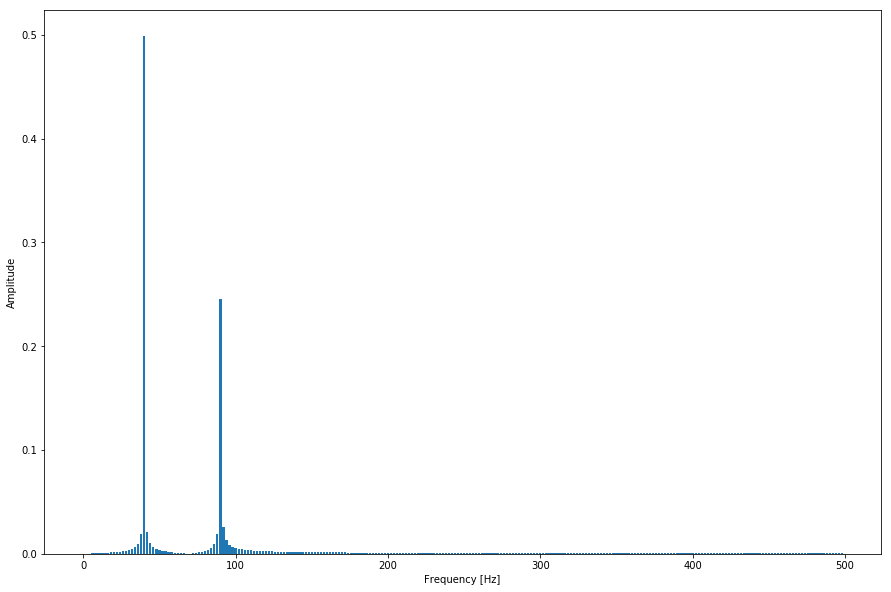

In [55]:
# The complex output numbers of the FFT contains the following information:
#     Amplitude of a certain frequency sine wave (energy).
#     Phase offset of a certain frequency sine wave.
T = t[1] - t[0] # sample rate
N = s.size
# 1/T = frequency
f = np.linspace(0, 1 / T, N)
plt.figure(figsize=(15,10))
plt.ylabel("Amplitude")
plt.xlabel("Frequency [Hz]")
plt.bar(f[:N//2], np.abs(fft)[:N//2] * 1/N, width=1.5)  # 1 / N is a normalization factor
print(np.abs(fft)[:N//2]*1/N)

[  0.   2.   4.   6.   8.  10.  12.  14.  16.  18.  20.  22.  24.  26.
  28.  30.  32.  34.  36.  38.  40.  42.  44.  46.  48.  50.  52.  54.
  56.  58.  60.  62.  64.  66.  68.  70.  72.  74.  76.  78.  80.  82.
  84.  86.  88.  90.  92.  94.  96.  98. 100. 102. 104. 106. 108. 110.
 112. 114. 116. 118. 120. 122. 124. 126. 128. 130. 132. 134. 136. 138.
 140. 142. 144. 146. 148. 150. 152. 154. 156. 158. 160. 162. 164. 166.
 168. 170. 172. 174. 176. 178. 180. 182. 184. 186. 188. 190. 192. 194.
 196. 198. 200. 202. 204. 206. 208. 210. 212. 214. 216. 218. 220. 222.
 224. 226. 228. 230. 232. 234. 236. 238. 240. 242. 244. 246. 248. 250.
 252. 254. 256. 258. 260. 262. 264. 266. 268. 270. 272. 274. 276. 278.
 280. 282. 284. 286. 288. 290. 292. 294. 296. 298. 300. 302. 304. 306.
 308. 310. 312. 314. 316. 318. 320. 322. 324. 326. 328. 330. 332. 334.
 336. 338. 340. 342. 344. 346. 348. 350. 352. 354. 356. 358. 360. 362.
 364. 366. 368. 370. 372. 374. 376. 378. 380. 382. 384. 386. 388. 390.
 392. 